# Intro to Convolutional Neural Networks in PyTorch

Convolutional Neural Networks (CNNs) are the basis of most computer vision models in deep learning. We'll see why they're so useful shortly.

This Jupyter notebook will introduce you to the basics of CNNs in PyTorch. We'll cover:
1. Convolutional Layers
2. Pooling Layers
3. Simple CNN Model
4. Training a CNN
5. MNIST

## 1. Convolutional Layers

Last time, we used nn.Linear layers in our model. These are the most general type of layer, but nn.Linear layers aren't typically used much in computer vision (except as the last layer). There are several reasons for this:

### 1) Large number of parameters

Images are large. Suppose we have a 1000 x 1000 x 3 input image (width x height x color channel). That's a 3 million-dimensional input! If we use an nn.Linear layer with an output size of 1000, this would require 3 billion weights, which is an enormous amount for a simple model.

### 2) No spatial representation

To use in an nn.Linear layer, we must flatten the input. This destroys the concept of position where pixels in a square region are located as part of the same object.

### 3) Empirically perform worse

If you train a network using nn.Linear layers vs a CNN, the CNN almost always performs better.

## Convolutional Layer

A Convolutional Layer applies a series of filters to an input image to create a feature map that summarizes the presence of detected features in the input. For example,
- A simple edge-detecting filter could highlight the boundaries in images.

We define convolutional layers in PyTorch using nn.Conv2d:

In [ ]:
import torch
import torch.nn as nn

# Define a convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)

Here's an illustration of what a convolutional layer does:

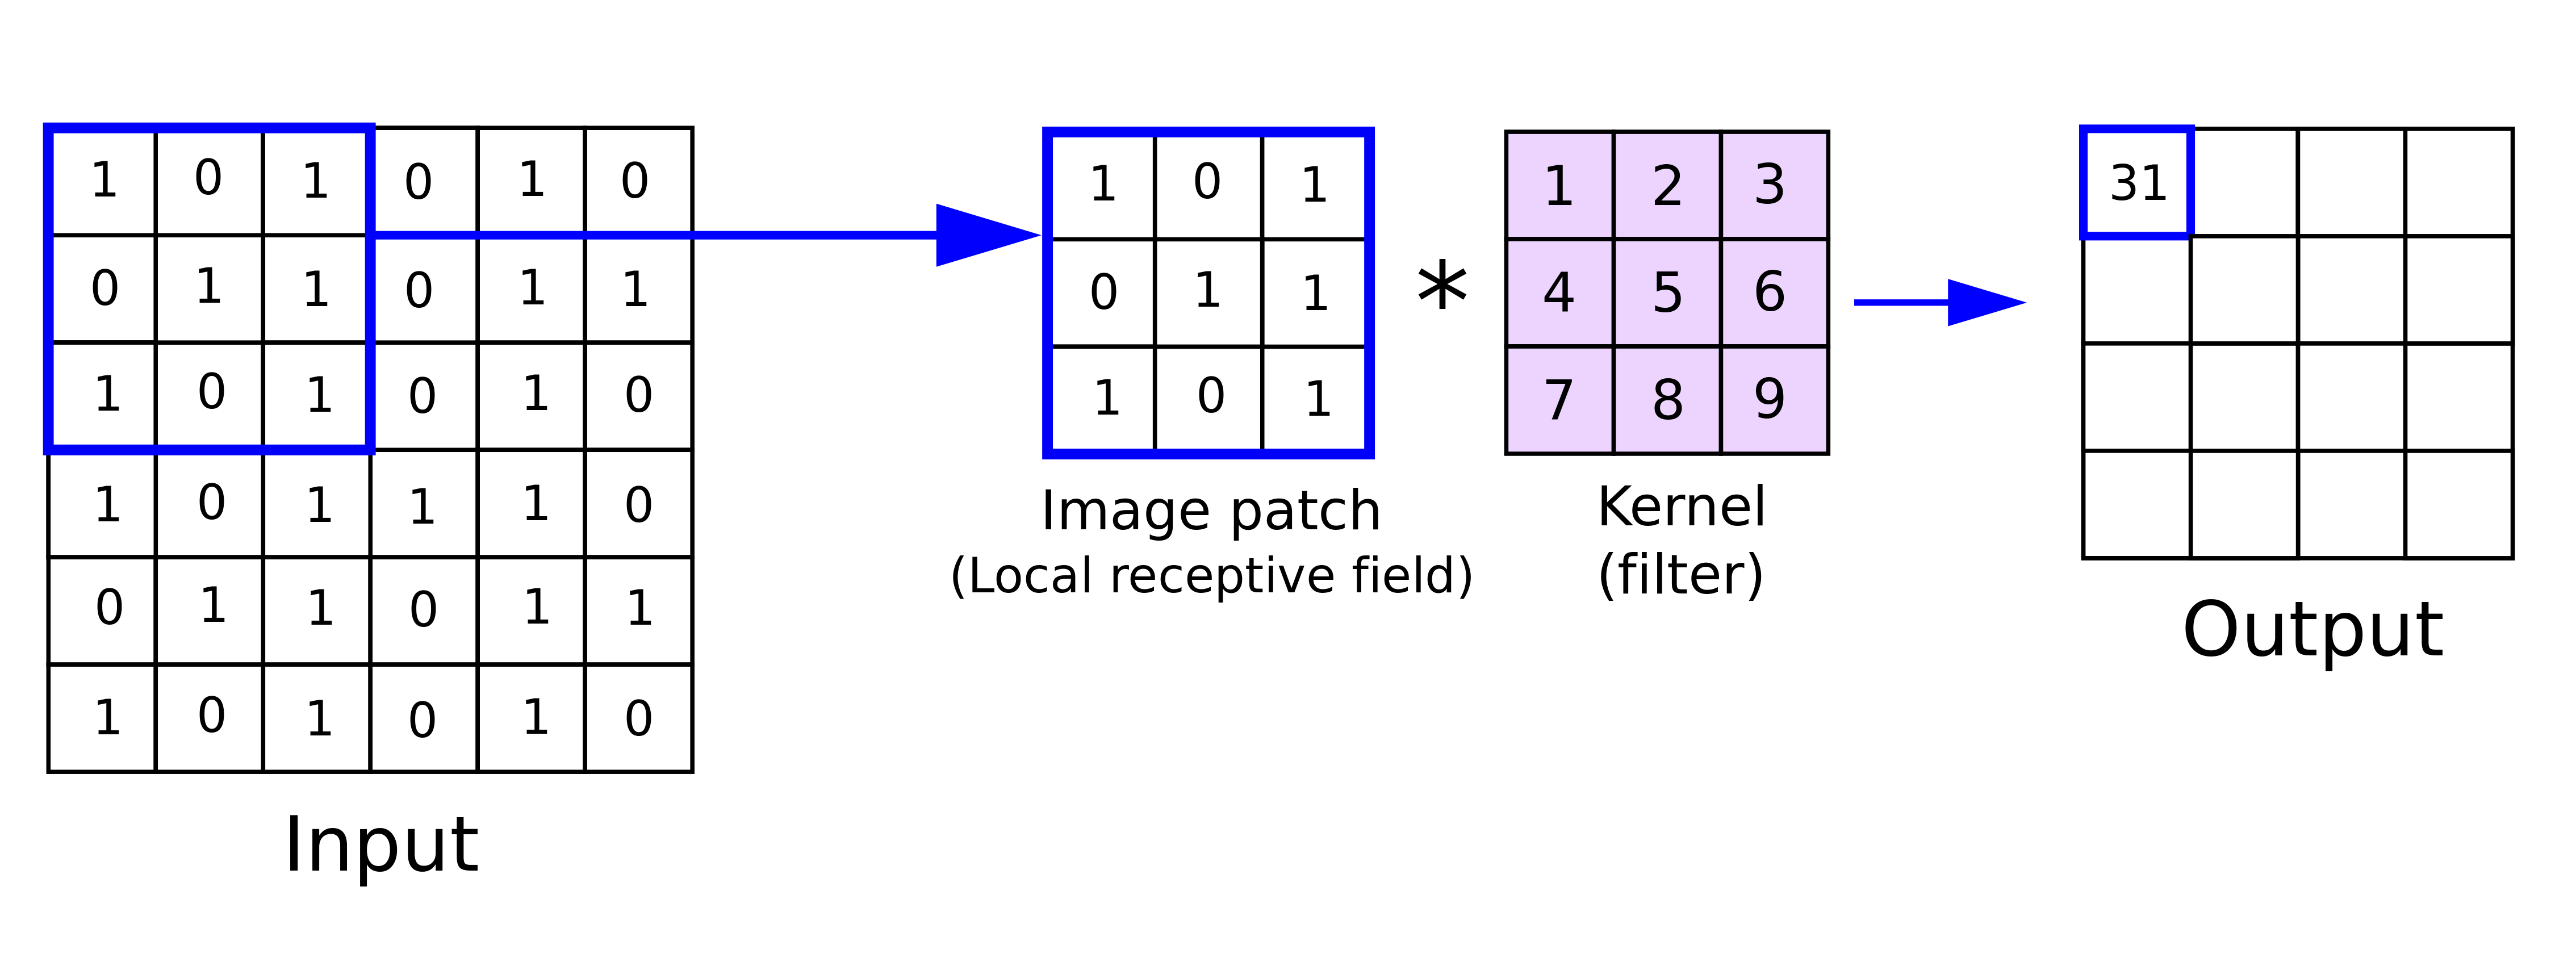

There's a number of parameters here. Here's what they mean:

- Kernel (or Filter): A small matrix used to apply effects such as blurring, sharpening, and edge detection to images. It slides over the input image to produce a feature map.

- Kernel Size: Refers to the width and height of the filter kernel. Common sizes include 3x3, 5x5, and 7x7. This size affects the extent of connectivity between layers in the network.

- Stride: The number of pixels by which the kernel moves across the image. A stride of 1 moves the kernel one pixel at a time, while a stride of 2 moves it two pixels, and so on. Increasing the stride reduces the size of the output feature map.

- Padding: Adding pixels of a certain value, usually zero, around the input image. This allows the convolutional operation to be applied to the border pixels of the input image and controls the spatial size of the output feature maps.

- Feature Map: The output of one filter applied to the previous layer. A feature map captures the presence of specific features or patterns in the input.

In [ ]:
x = torch.arange(100).reshape((1, 10, 10)).to(torch.float32)

conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)
y = conv_layer(x)
print(y)
print("y.shape:", y.shape)

tensor([[[ -3.6041,  -4.2726,  -4.9410,  -5.6094,  -6.2778,  -6.9462,  -7.6147,
           -8.2831],
         [-10.2883, -10.9567, -11.6252, -12.2936, -12.9620, -13.6304, -14.2988,
          -14.9672],
         [-16.9725, -17.6409, -18.3093, -18.9777, -19.6462, -20.3146, -20.9830,
          -21.6514],
         [-23.6567, -24.3251, -24.9935, -25.6619, -26.3303, -26.9987, -27.6672,
          -28.3356],
         [-30.3408, -31.0092, -31.6777, -32.3461, -33.0145, -33.6829, -34.3513,
          -35.0197],
         [-37.0250, -37.6934, -38.3618, -39.0302, -39.6987, -40.3671, -41.0355,
          -41.7039],
         [-43.7092, -44.3776, -45.0460, -45.7144, -46.3828, -47.0512, -47.7197,
          -48.3881],
         [-50.3933, -51.0617, -51.7302, -52.3986, -53.0670, -53.7354, -54.4038,
          -55.0722]]], grad_fn=<SqueezeBackward1>)
y.shape: torch.Size([1, 8, 8])


Here's an illustration of stride:
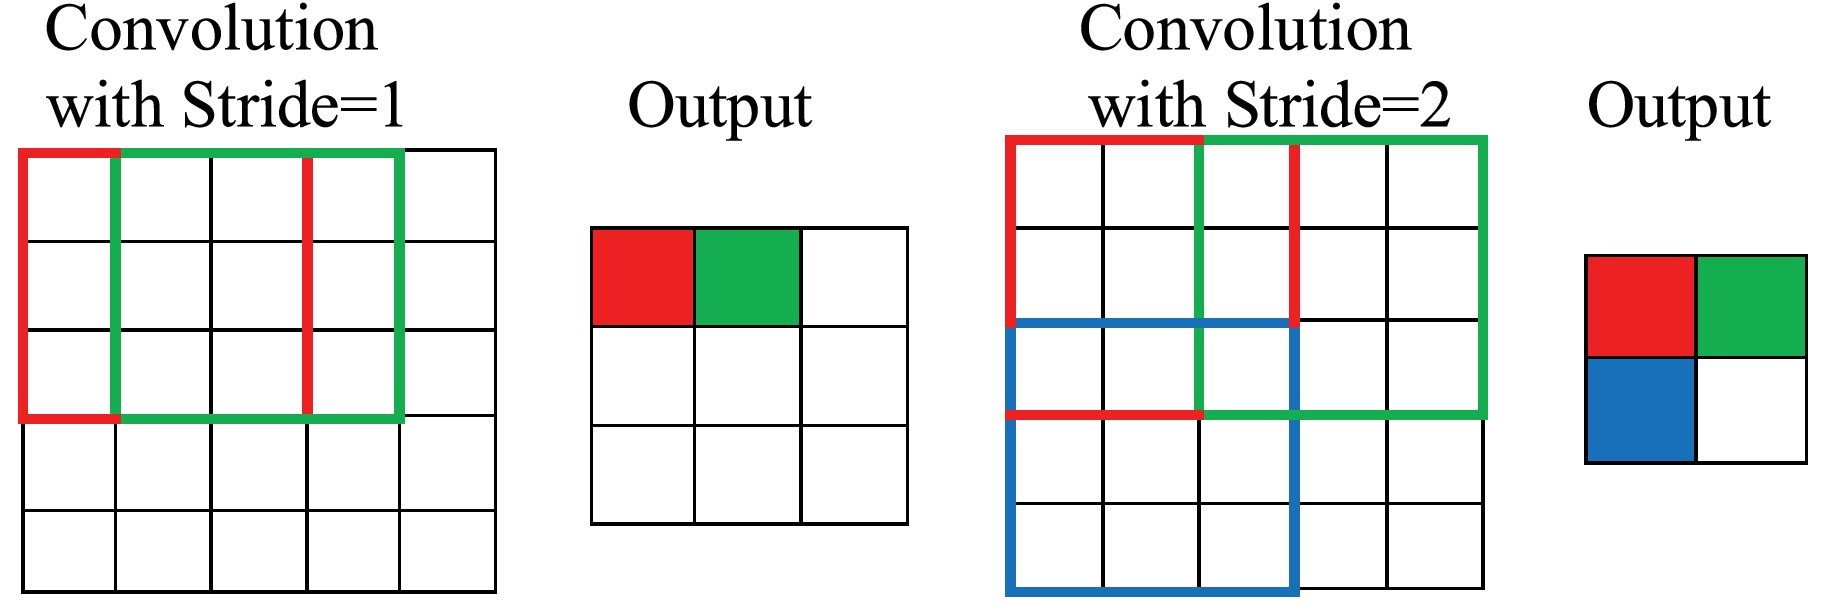

Here's an illustration of padding:

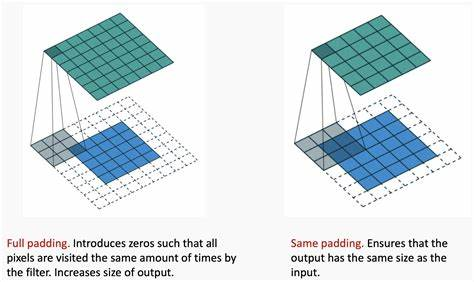

# 2. Pooling Layers

Pooling layers reduce the dimensions of the feature maps. It helps reduce the computational load and the model's overfitting risk. The most common type is max pooling.

We define pooling layers in PyTorch using nn.MaxPool2d:

In [ ]:
# Define a max pooling layer
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

Here's an illustration of what pooling does. It essentially takes the max value over every 2x2 region.

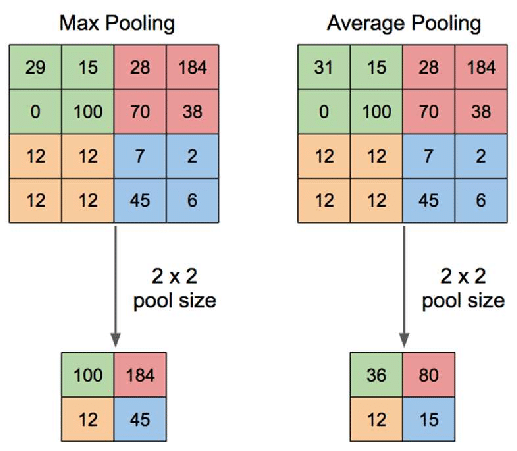

This layer reduces the size of the feature maps by half.

# 3. Simple CNN Model

We combine convolutional layers, pooling layers, and fully connected layers to form a CNN. The convolutional and pooling layers extract features from the input, and the fully connected layers decide the input class based on these features.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10) # Assuming input images are 28x28 pixels

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = torch.relu(self.fc1(x))
        return x

model = CNN()

# 4. Training a CNN
Training a CNN involves the same steps as training a simple neural network: defining a loss function, an optimizer, and iterating through data in loops.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


# 5. MNIST

Let's run this on MNIST! MNIST (Modified National Institute of Standards and Technology) is essentially the "Hello World" of machine learning. The task is simply to classify handwritten digits.

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    output = F.log_softmax(x, dim=1)
    return output

To train it on the MNIST dataset, we can simply grab it from datasets. We'll need to convert it to a tensor, which we can do via transforms.ToTensor.

In [ ]:
from torchvision import datasets, transforms

transform=transforms.Compose([
        transforms.ToTensor(),
])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False, download=True,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 158506844.34it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33133395.47it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39931702.76it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21073593.77it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Loss: 0.2532466148326138
Loss: 0.0960300785493352
Loss: 0.07387286280669066
Loss: 0.06267594722005775
Loss: 0.05435403143658912
Loss: 0.0466672458645847
Loss: 0.04168158210087955
Loss: 0.035912446147183696
Loss: 0.033769984184930636
Loss: 0.03272444593345263
Loss: 0.02801351317539074
Loss: 0.02797952625373163
Loss: 0.024233938848530538
Loss: 0.023841067575239593
Loss: 0.02173555776456568


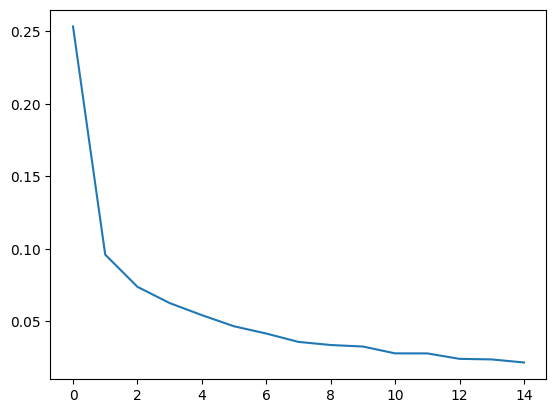

In [ ]:
import torch.optim as optim
from matplotlib import pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 15
losses = []
for epoch in range(epochs):
  epoch_loss = 0
  for Xb, yb in train_loader:
    Xb, yb = Xb.to(device), yb.to(device)
    optimizer.zero_grad()
    y_pred = model(Xb)
    loss = F.nll_loss(y_pred, yb)
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  epoch_loss /= len(train_loader)
  losses.append(epoch_loss)
  print(f"Loss: {epoch_loss}")

plt.plot(np.arange(epochs), losses)

In [ ]:
model.eval()
correct = 0

with torch.no_grad():
  for Xb, yb in test_loader:
    Xb, yb = Xb.to(device), yb.to(device)
    y_pred = model(Xb)
    pred = y_pred.argmax(dim=1, keepdim=True)
    correct += pred.eq(yb.view_as(pred)).sum().item()

print(f"Accuracy: {correct / len(test_loader.dataset)}")

Accuracy: 0.9924


torch.Size([1, 28, 28])
tensor(7, device='cuda:0')


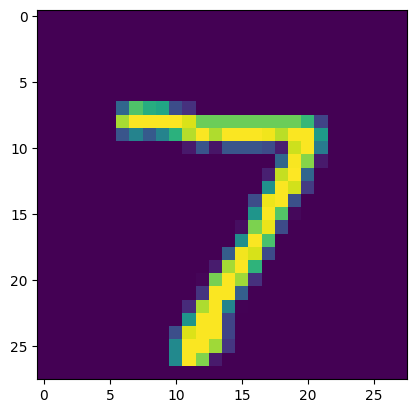

In [ ]:
index = 0

X = test_loader.dataset[index][0]

plt.imshow(X.squeeze(0))

X = X.to(device=device)
print(X.shape)
print(model(X.unsqueeze(0)).argmax())